In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as pgo

In [2]:
data = pd.read_csv('datasets/Electric_Vehicle_Population_Data.csv')
# data = pd.read_csv('datasets/ElectricCarData_Clean.csv')
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10


In [3]:
data = data[['Model Year', 'Make', 'Model', 'Electric Range', 'Base MSRP', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Legislative District', 'Electric Utility']]
data.head(3)

,Model Year,Make,Model,Electric Range,Base MSRP,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Legislative District,Electric Utility
0,2019,TESLA,MODEL 3,220.0,0.0,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,22.0,PUGET SOUND ENERGY INC
1,2022,NISSAN,LEAF,0.0,0.0,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,10.0,PUGET SOUND ENERGY INC
2,2020,TESLA,MODEL 3,266.0,0.0,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,44.0,PUGET SOUND ENERGY INC


In [4]:
data.shape, data.size

((135038, 9), 1215342)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 9 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Model Year                                         135038 non-null  int64  
 1   Make                                               135038 non-null  object 
 2   Model                                              134789 non-null  object 
 3   Electric Range                                     135037 non-null  float64
 4   Base MSRP                                          135037 non-null  float64
 5   Electric Vehicle Type                              135038 non-null  object 
 6   Clean Alternative Fuel Vehicle (CAFV) Eligibility  135038 non-null  object 
 7   Legislative District                               134726 non-null  float64
 8   Electric Utility                                   135030 non-null  object 

In [6]:
data.isna().sum()

Model Year                                             0
Make                                                   0
Model                                                249
Electric Range                                         1
Base MSRP                                              1
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Legislative District                                 312
Electric Utility                                       8
dtype: int64

### Data cleaning

In [7]:
print('before', data.shape)
data.dropna(inplace=True)
data = data[data['Base MSRP'] != 0]
print('after', data.shape)

before (135038, 9)
after (3419, 9)


### Descriptive Analysis

In [8]:
data.describe()

,Model Year,Electric Range,Base MSRP,Legislative District
count,3419.000000,3419.000000,3419.000000,3419.000000
mean,2015.558058,123.516525,57085.415326,30.623867
std,2.462310,89.336377,22775.987782,14.529386
min,2008.000000,12.000000,31950.000000,1.000000
25%,2013.000000,17.000000,39995.000000,21.000000
50%,2016.000000,93.000000,59900.000000,35.000000
75%,2018.000000,208.000000,69900.000000,43.000000
max,2020.000000,265.000000,845000.000000,49.000000


###### More in depth:

<AxesSubplot:>

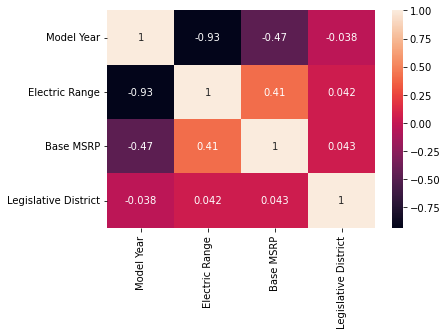

In [9]:
sns.heatmap(data.corr(), annot=True)

In [10]:
#del
def data_stats(data):
    return data.mean(), data.mode(), data.median()

sts = data_stats(data['Electric Range'])
estimates = pd.DataFrame(data={'Observation': 'Electric Range','Mean': round(sts[0], 2),
                               'Mode': sts[1][0], 'Median': sts[2]}, index=[0])

sts = data_stats(data['Base MSRP'])
estimates.loc[len(estimates)] = {'Observation': 'BaseMSRP','Mean': round(sts[0], 2),
                  'Mode': sts[1][0], 'Median': sts[2]}
estimates

,Observation,Mean,Mode,Median
0,Electric Range,123.52,208.0,93.0
1,BaseMSRP,57085.42,69900.0,59900.0


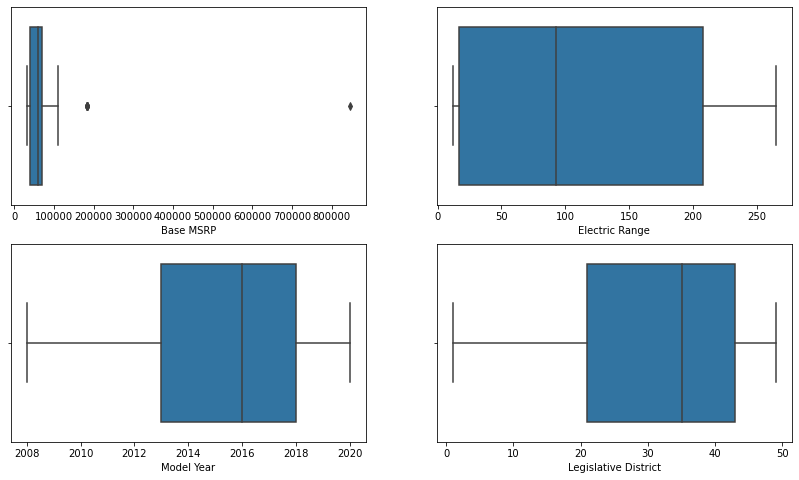

In [11]:
def box_plot(data):
    fig, ax = plt.subplots(2, 2, figsize=(14,8))
    sns.boxplot(x=data['Base MSRP'], ax=ax[0,0])
    # sns.boxplot(x=data[data['Base MSRP']<200000]['Base MSRP'], ax=ax[0,0])
    sns.boxplot(x=data['Electric Range'], ax=ax[0,1])
    sns.boxplot(x=data['Model Year'], ax=ax[1,0])
    sns.boxplot(x=data['Legislative District'], ax=ax[1,1])

box_plot(data)
plt.show()

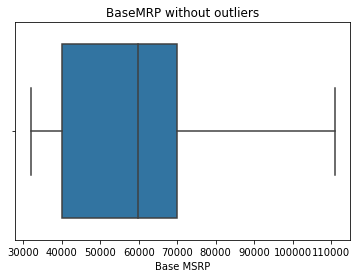

In [12]:
sns.boxplot(x=data[data['Base MSRP']<180000]['Base MSRP'])
plt.title('BaseMRP without outliers')
plt.show()

In [36]:
# data[data['Base MSRP']>800000]
data[data['Base MSRP']>180000]

,Model Year,Make,Model,Electric Range,Base MSRP,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Legislative District,Electric Utility
3810,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,43.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
7028,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.0,PUGET SOUND ENERGY INC
17910,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17.0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
31413,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,40.0,PUGET SOUND ENERGY INC
48667,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,41.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
57623,2015,PORSCHE,918,12.0,845000.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,48.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
65769,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17.0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
88022,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,47.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
103994,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
113994,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,41.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [37]:
data_v2 = data[data['Base MSRP']<180000]

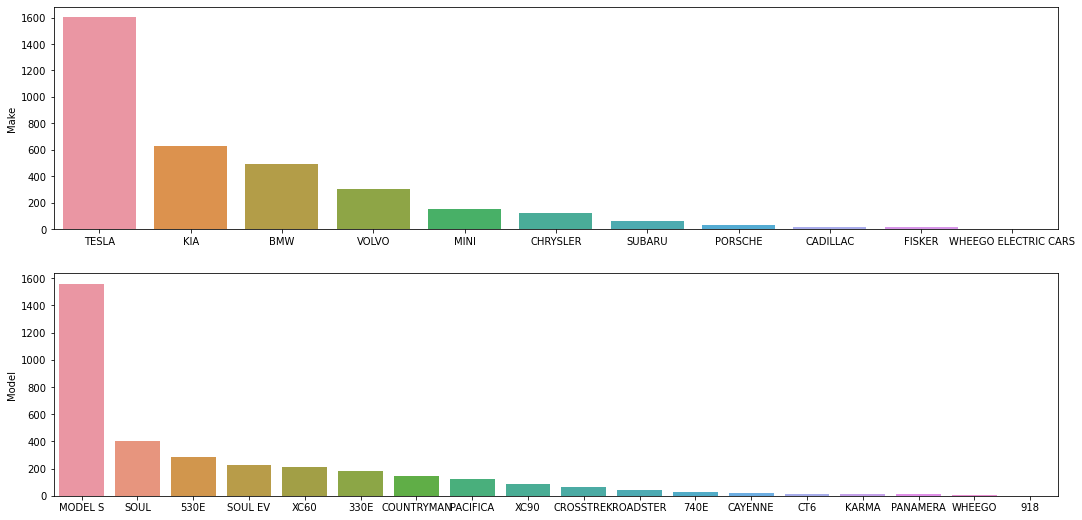

In [39]:
cat_data = data['Make'].value_counts()
cat2 = data['Model'].value_counts()
# plt.pie(x=cat_data,labels=cat_data.index, radius=2, labeldistance=1.2, autopct='%1.0f%%')
# fig = plt.figure(figsize=(18,4))
fig, ax = plt.subplots(2, 1, figsize=(18,9))
sns.barplot(x=cat_data.index, y=cat_data, ax=ax[0])
sns.barplot(x=cat2.index, y=cat2, ax=ax[1])

plt.show()

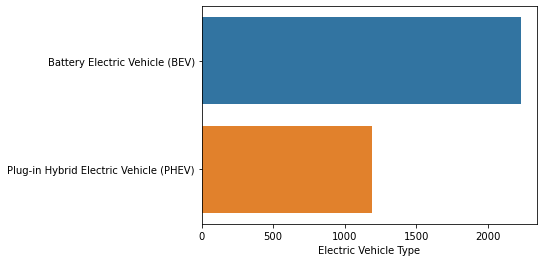

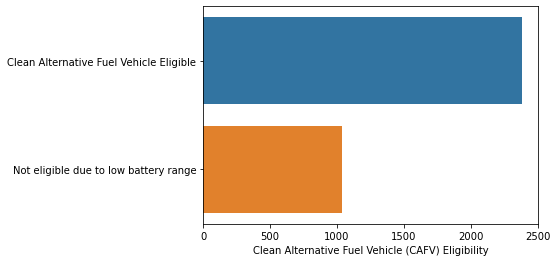

In [15]:
def plot_bar(Xdata):
    sns.barplot(x=Xdata, y=Xdata.index)
    plt.show()
plot_bar(data['Electric Vehicle Type'].value_counts())
plot_bar(data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts())

# Statistical Analysis

In [41]:
import scipy.stats as st

# print('(coef r, p-val)', st.pearsonr(data['Electric Range'], data['Base MSRP']))
# print('(coef r, p-val)', st.pearsonr(data['Model Year'], data['Base MSRP']))

print('(coef r, p-val)', st.pearsonr(data_v2['Electric Range'], data_v2['Base MSRP']))
print('(coef r, p-val)', st.pearsonr(data_v2['Model Year'], data_v2['Base MSRP']))

(coef r, p-val) (0.41082609259027675, 2.2765588009045022e-139)
(coef r, p-val) (-0.47061801188721714, 4.955976381040272e-188)
(coef r, p-val) (0.603310560936324, 0.0)
(coef r, p-val) (-0.6575996705531116, 0.0)


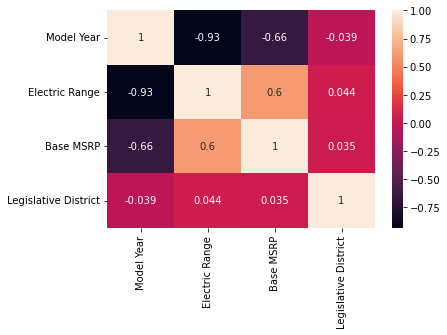

In [42]:
sns.heatmap(data_v2.corr(), annot=True);

In [18]:
data_group = data.groupby(['Make', 'Model']).mean()[['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District']]
data_group['Base MSRP'] = round(data_group['Base MSRP'], 2)
data_group['Electric Range'] = round(data_group['Electric Range'], 2)
data_group['Model Year'] = round(data_group['Model Year'])
data_group['Legislative District'] = round(data_group['Legislative District'], 2)
print('Mean Values')
data_group

Mean Values


Model Year  Electric Range  Base MSRP  \
Make                 Model                                               
BMW                  330E            2017.0           14.00   44693.96   
                     530E            2018.0           14.87   54381.99   
                     740E            2018.0           14.00   90382.00   
CADILLAC             CT6             2018.0           31.00   75095.00   
CHRYSLER             PACIFICA        2019.0           32.00   39995.00   
FISKER               KARMA           2012.0           33.00  102000.00   
KIA                  SOUL            2016.0           93.00   31950.00   
                     SOUL EV         2017.0           98.89   32806.64   
MINI                 COUNTRYMAN      2019.0           12.00   36867.11   
PORSCHE              918             2015.0           12.00  845000.00   
                     CAYENNE         2020.0           14.00   81100.00   
                     PANAMERA        2018.0           14.00  184400.00   
SUBARU               CROSSTREK       2019.0           17.00   34995.00   
TESLA                MODEL S         2013.0          212.65   69084.33   
                     ROADSTER        2009.0          234.67  105696.74   
VOLVO                XC60            2018.0           17.00   52900.00   
                     XC90            2018.0           19.00   64950.00   
WHEEGO ELECTRIC CARS WHEEGO          2010.0          100.00   32995.00   

                                 Legislative District  
Make                 Model                             
BMW                  330E                       29.45  
                     530E                       30.19  
                     740E                       29.44  
CADILLAC             CT6                        28.56  
CHRYSLER             PACIFICA                   28.66  
FISKER               KARMA                      29.93  
KIA                  SOUL                       29.78  
                     SOUL EV                    30.49  
MINI                 COUNTRYMAN                 30.68  
PORSCHE              918                        48.00  
                     CAYENNE                    32.33  
                     PANAMERA                   34.82  
SUBARU               CROSSTREK                  28.57  
TESLA                MODEL S                    31.31  
                     ROADSTER                   30.20  
VOLVO                XC60                       29.99  
                     XC90                       32.48  
WHEEGO ELECTRIC CARS WHEEGO                     18.67

In [19]:
# BASE MSRP:
models = data['Make'].unique()
mu_ls = [round(data[data['Make']==name]['Base MSRP'].mean(), 2) for name in data['Make'].unique()]
# var_ls = [data[data['Make']==name]['Base MSRP'].var() for name in data['Make'].unique()]
var_ls = [round(data[data['Make']==name]['Base MSRP'].var(), 2) for name in data['Make'].unique()]
std_ls = [round(data[data['Make']==name]['Base MSRP'].std(), 2) for name in data['Make'].unique()]
count_ls = [data[data['Make']==name].shape[0] for name in models]

year_ls = [round(data[data['Make']==name]['Model Year'].mean()) for name in data['Make'].unique()]
range_ls = [round(data[data['Make']==name]['Electric Range'].mean()) for name in data['Make'].unique()]
varE_ls = [round(data[data['Make']==name]['Electric Range'].var(), 2) for name in data['Make'].unique()]
stdE_ls = [round(data[data['Make']==name]['Electric Range'].std(), 2) for name in data['Make'].unique()]

In [20]:
my_stats_view = pd.DataFrame(data={'MODEL': models, 'Mean BaseMSRP': mu_ls, 'Variance BaseMSRP': var_ls, 'std BaseMSRP': std_ls, 'N': count_ls, 'Year': year_ls, 'Mean Electric Range': range_ls, 'Variance El range': varE_ls, 'std El range': stdE_ls}) # columns=['Mean', 'Variance', 'std']
my_stats_view

,MODEL,Mean BaseMSRP,Variance BaseMSRP,std BaseMSRP,N,Year,Mean Electric Range,Variance El range,std El range
0,TESLA,70134.97,4.559886e+07,6752.69,1603,2013,213,254.44,15.95
1,VOLVO,56354.33,2.979160e+07,5458.17,300,2018,18,0.82,0.91
2,BMW,52631.03,9.846937e+07,9923.17,493,2018,15,0.65,0.81
3,MINI,36867.11,2.222020e+03,47.14,149,2019,12,0.00,0.00
4,KIA,32259.27,3.996900e+05,632.21,626,2016,95,33.83,5.82
5,CHRYSLER,39995.00,0.000000e+00,0.00,121,2019,32,0.00,0.00
6,WHEEGO ELECTRIC CARS,32995.00,0.000000e+00,0.00,3,2010,100,0.00,0.00
7,SUBARU,34995.00,0.000000e+00,0.00,63,2019,17,0.00,0.00
8,PORSCHE,144440.00,2.001946e+10,141490.14,30,2019,14,0.13,0.37
9,FISKER,102000.00,0.000000e+00,0.00,15,2012,33,0.00,0.00


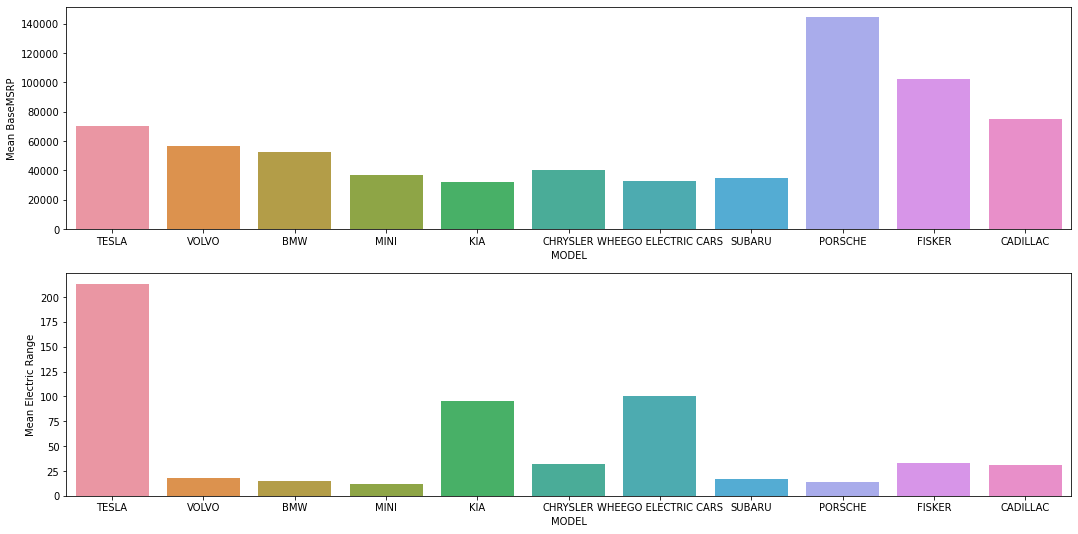

In [21]:
# Comparison of Brand Price and Range means
fig, ax = plt.subplots(2, 1, figsize=(18, 9))
sns.barplot(data=my_stats_view, x='MODEL', y='Mean BaseMSRP', ax=ax[0])
sns.barplot(data=my_stats_view, x='MODEL', y='Mean Electric Range', ax=ax[1])
plt.show()

In [22]:
# del. comparison some model price means
data[data['Model']=='MODEL S']['Base MSRP'].mean(), data[data['Model']=='SOUL']['Base MSRP'].mean()


(69084.32883750803, 31950.0)

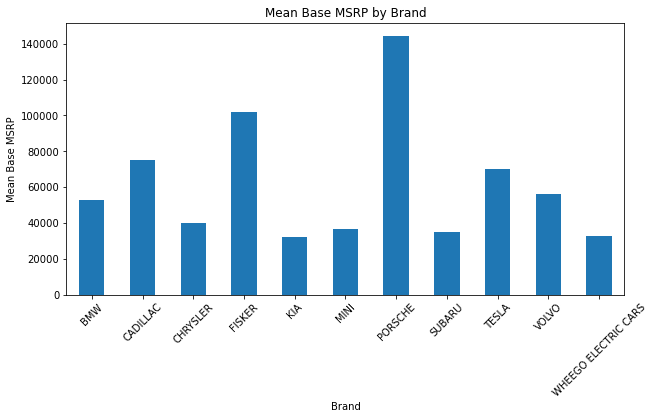

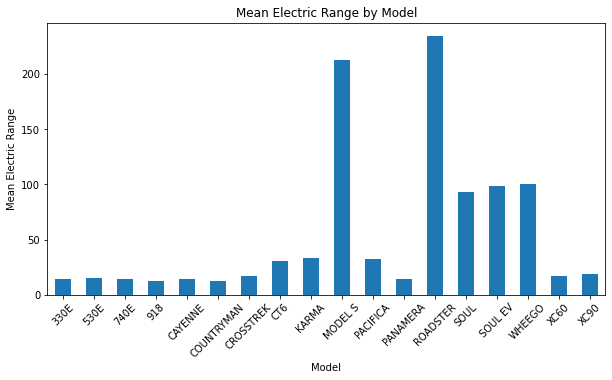

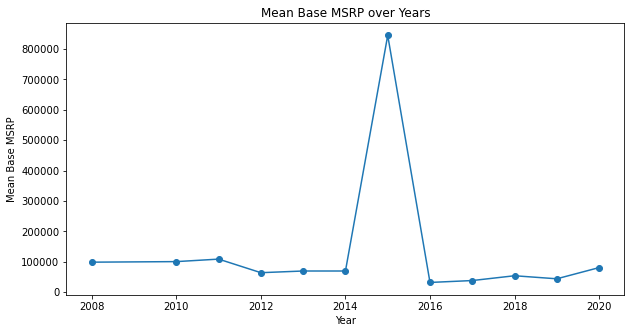

In [23]:
def plot_mean(data):
    brand_mean_msrp = data.groupby('Make')['Base MSRP'].mean()
    plt.figure(figsize=(10,5))
    brand_mean_msrp.plot(kind='bar')
    plt.title('Mean Base MSRP by Brand')
    plt.ylabel('Mean Base MSRP')
    plt.xlabel('Brand')
    plt.xticks(rotation=45)
    plt.show()

    model_mean_range = data.groupby('Model')['Electric Range'].mean()
    plt.figure(figsize=(10,5))
    model_mean_range.plot(kind='bar')
    plt.title('Mean Electric Range by Model')
    plt.ylabel('Mean Electric Range')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.show()

    year_mean_msrp = data.groupby('Model Year')['Base MSRP'].mean()
    plt.figure(figsize=(10,5))
    year_mean_msrp.plot(kind='line', marker='o')
    plt.title('Mean Base MSRP over Years')
    plt.ylabel('Mean Base MSRP')
    plt.xlabel('Year')
    plt.show()
plot_mean(data)

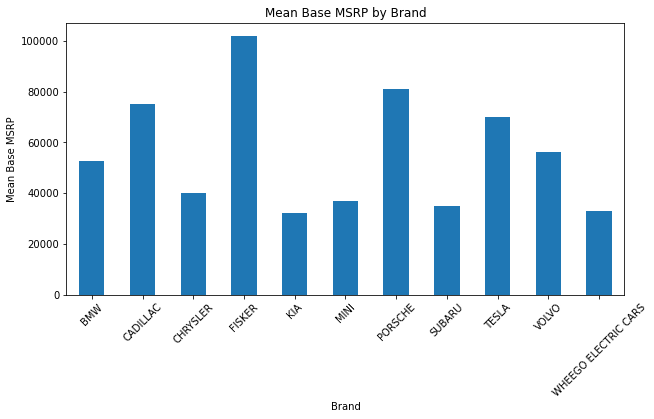

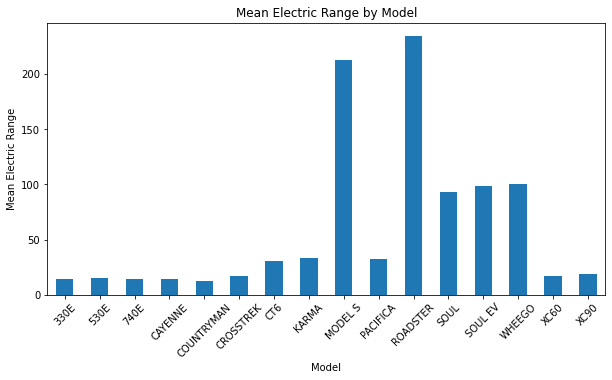

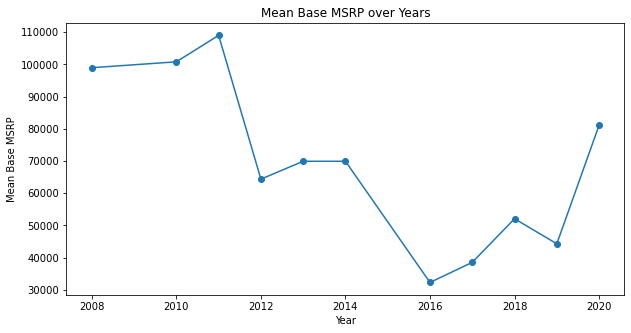

In [43]:
# plot means without outliers
plot_mean(data_v2)

## Timeseries

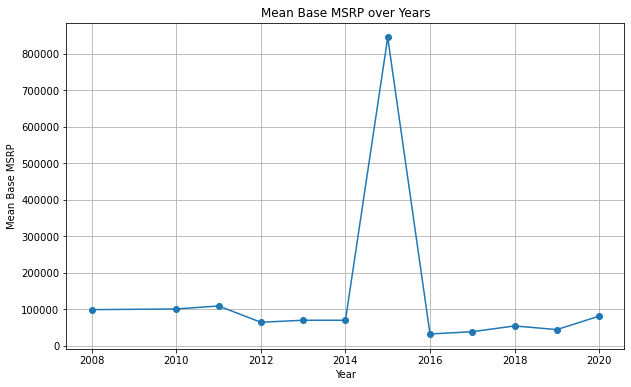

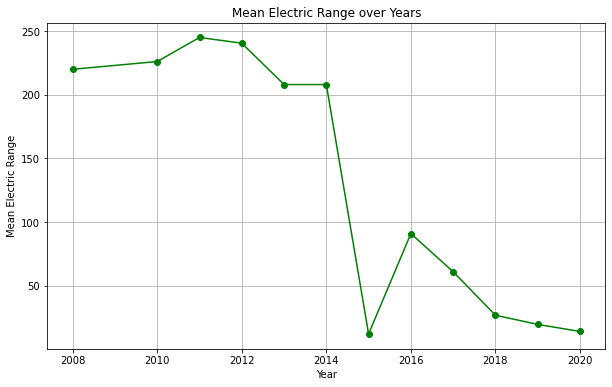

In [25]:
# Group data by 'Model Year' and calculate mean Base MSRP and Electric Range for each year
def plot_time_series(data):
    yearly_stats = data.groupby('Model Year').agg({'Base MSRP': 'mean', 'Electric Range': 'mean'})

    # time series plot for Mean "Base MSRP" over years
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_stats.index, yearly_stats['Base MSRP'], marker='o')
    plt.title('Mean Base MSRP over Years')
    plt.xlabel('Year')
    plt.ylabel('Mean Base MSRP')
    plt.grid(True)
    plt.show()
    # time series plot for Mean "Electric Range" over years
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_stats.index, yearly_stats['Electric Range'], marker='o', color='green')
    plt.title('Mean Electric Range over Years')
    plt.xlabel('Year')
    plt.ylabel('Mean Electric Range')
    plt.grid(True)
    plt.show()
plot_time_series(data)

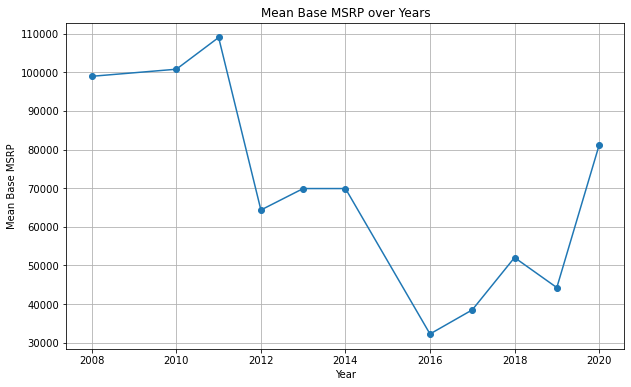

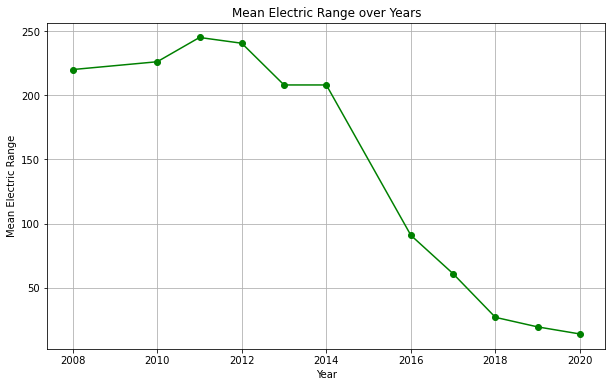

In [44]:
# TimeS without outliers
plot_time_series(data_v2)

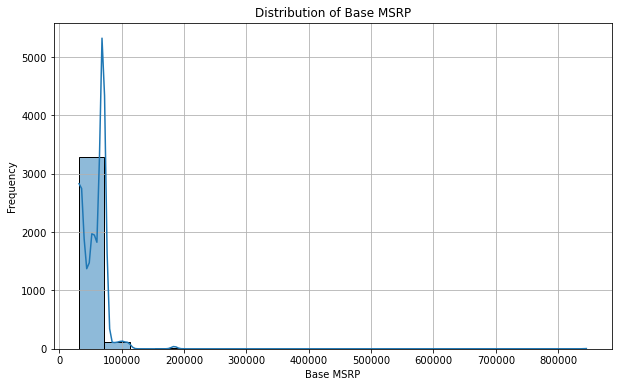

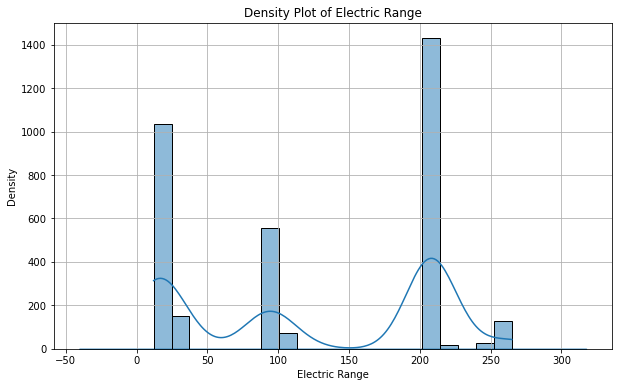

In [27]:
# del
plt.figure(figsize=(10, 6))
sns.histplot(data['Base MSRP'], bins=20, kde=True)
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data['Electric Range'], shade=True)
sns.histplot(data['Electric Range'], bins=20, kde=True)
plt.title('Density Plot of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Density')
plt.grid(True)
plt.show()

## Regression Analysis

Mean Absolute Error: 9095.288290922275
Mean Squared Error: 161932218.85559905
R-squared Score: 0.42619188361183913


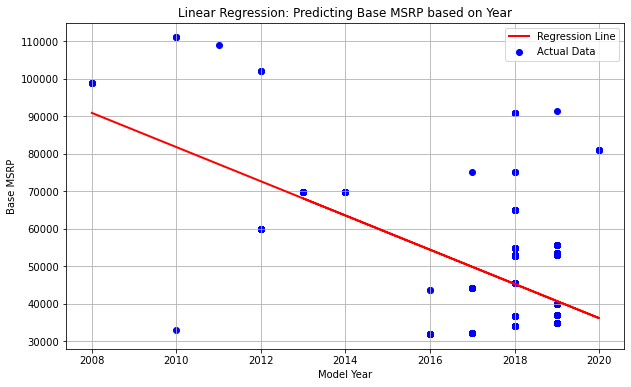

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# X = data[['Model Year']]
# y = data['Base MSRP']

X = data_v2[['Model Year']]
y = data_v2['Base MSRP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Plot the regression line and the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Predicting Base MSRP based on Year')
plt.xlabel('Model Year')
plt.ylabel('Base MSRP')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# Create a pipeline with feature scaling and Ridge regression
model = make_pipeline(StandardScaler(), Ridge(alpha=0.1))  # <-- adjust alpha as needed

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Absolute Error: 9095.433792547696
Mean Squared Error: 161931768.15572256
R-squared Score: 0.4261934806704666


### ANOVA
#### Null Hypothesis: $\mu_0$ = ... = $\mu_k$
#### Alternative Hypothesis: $\mu_0$ $\neq$ ... $\neq$ $\mu_k$
##### $\alpha$=0.05
##### Rejection:  K$_\alpha$ 0.05 < F

ANOVA Results:
F-statistic: 508.8167578691747
p-value: 0.0
There is a statistically significant difference in means across brands.


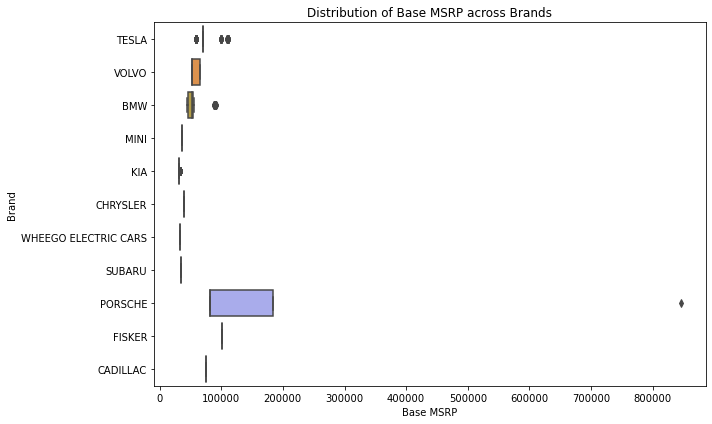

In [49]:
# Perform one-way ANOVA to compare mean Base MSRP across brands

anova_results = st.f_oneway(*[data[data['Make'] == brand]['Base MSRP'] for brand in data['Make'].unique()])
# anova_results = st.f_oneway(*[data_v2[data_v2['Make'] == brand]['Base MSRP'] for brand in data_v2['Make'].unique()])

# Display ANOVA results
print("ANOVA Results:")
print("F-statistic:", anova_results.statistic)
print("p-value:", anova_results.pvalue)

if anova_results.pvalue < 0.05:
    print("There is a statistically significant difference in means across brands.")
else:
    print("There is no statistically significant difference in means across brands.")


# Plot box plots to visualize the distribution of Base MSRP across brands
plt.figure(figsize=(10, 6))
# data.boxplot(column='Base MSRP', by='Make', vert=False)
sns.boxplot(x=data['Base MSRP'], y=data['Make'])              # origin
# sns.boxplot(x=data_v2['Base MSRP'], y=data_v2['Make'])      # without outliers
plt.title('Distribution of Base MSRP across Brands')
plt.xlabel('Base MSRP')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

### Cluster Analysis. KMeans

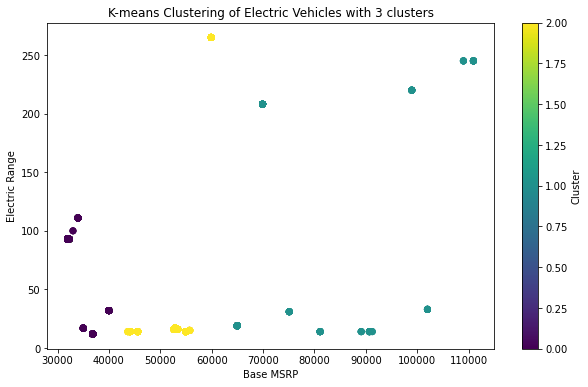

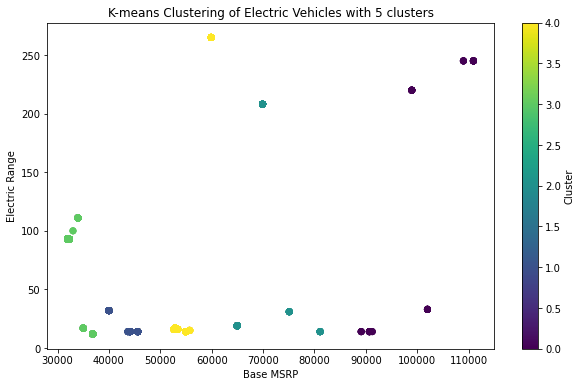

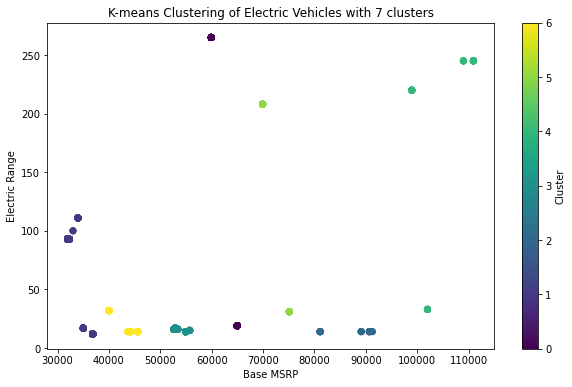

In [51]:
from sklearn.cluster import KMeans


# Prepare the data (using relevant columns)
data2 = data[data['Base MSRP']<180000][['Base MSRP', 'Electric Range']]
# X = data[['Base MSRP', 'Electric Range']]
X = data2[['Base MSRP', 'Electric Range']]

# Perform K-means clustering
for i in range(3, 8, 2):
    num_clusters = i  # Choose the number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    data2['Cluster'] = kmeans.fit_predict(X)

    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(data2['Base MSRP'], data2['Electric Range'], c=data2['Cluster'], cmap='viridis')
    plt.title(f'K-means Clustering of Electric Vehicles with {i} clusters')
    plt.xlabel('Base MSRP')
    plt.ylabel('Electric Range')
    plt.colorbar(label='Cluster')
    plt.show()


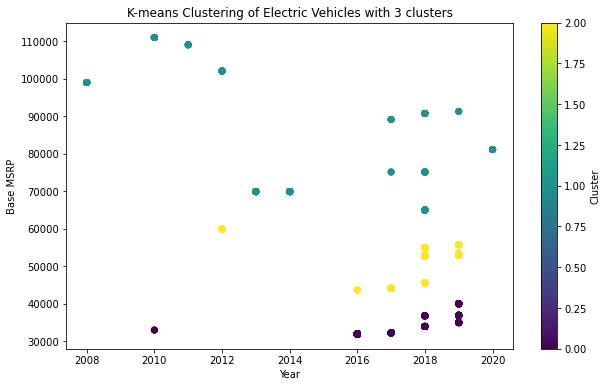

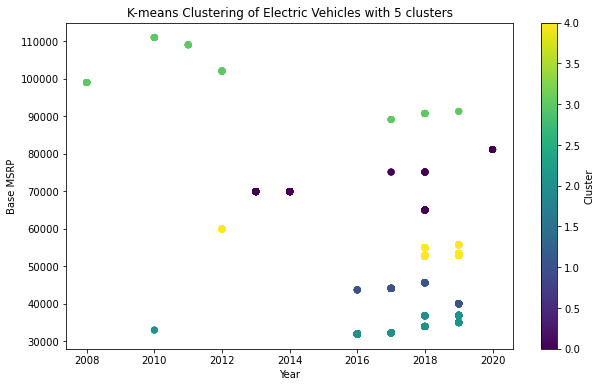

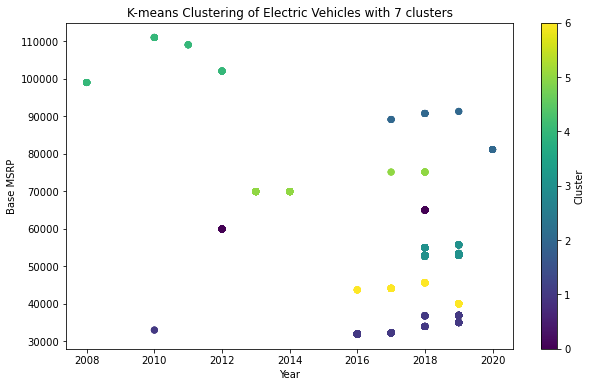

In [32]:
data3 = data[data['Base MSRP']<180000][['Model Year','Base MSRP']]
X2 = data3[['Model Year', 'Base MSRP']]

# Perform K-means clustering
for i in range(3, 8, 2):
    num_clusters = i  # Choose the number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    data3['Cluster'] = kmeans.fit_predict(X)

    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(data3['Model Year'], data3['Base MSRP'], c=data3['Cluster'], cmap='viridis')
    plt.title(f'K-means Clustering of Electric Vehicles with {i} clusters')
    plt.xlabel('Year')
    plt.ylabel('Base MSRP')
    plt.colorbar(label='Cluster')
    plt.show()

In [33]:
# acc